In [51]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import torch
import seaborn as sns
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings('ignore')

sys.path.append('..')
from ccmf import CCMF, CircuitEditor, UniformModel, load_fake_dm9

np.random.seed(0)

In [96]:
notebook_name = 'linear_no_noise'

# Load circuit

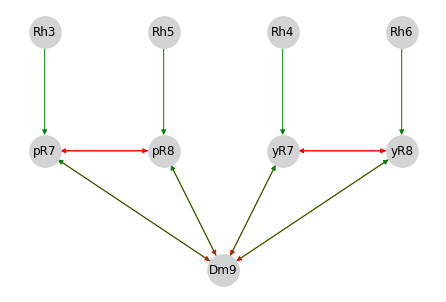

In [94]:
circuit = pickle.load(open('circuits/Dm9.circuit', 'rb'))
circuit.show()

# Load data

In [147]:
W, M, U, X = load_fake_dm9()
X

stimulus,300.000000,327.777778,355.555556,383.333333,411.111111,438.888889,466.666667,494.444444,522.222222,550.000000
cell,,,,,,,,,,
Rh3,0.606531,0.905955,0.993846,0.800737,0.473827,0.205924,0.065729,0.015408,0.002653,0.000335
Rh4,0.135335,0.352322,0.673638,0.945959,0.975611,0.738991,0.411112,0.167973,0.050406,0.011109
Rh5,0.011109,0.050406,0.167973,0.411112,0.738991,0.975611,0.945959,0.673638,0.352322,0.135335
Rh6,0.000335,0.002653,0.015408,0.065729,0.205924,0.473827,0.800737,0.993846,0.905955,0.606531
pR7,0.792459,1.161199,1.194870,0.762329,0.079556,-0.473936,-0.670218,-0.556945,-0.332050,-0.150686
yR7,0.171381,0.454857,0.869636,1.186215,1.103980,0.571343,-0.112891,-0.566997,-0.637469,-0.450452
pR8,-0.398385,-0.549900,-0.456876,-0.016921,0.609885,1.065438,1.090244,0.759515,0.367288,0.119314
yR8,-0.098619,-0.244481,-0.446824,-0.574247,-0.435394,0.041014,0.666359,1.084749,1.073630,0.740392
Dm9,-0.026529,-0.039411,-0.054828,-0.093737,-0.178657,-0.294283,-0.381648,-0.385191,-0.302119,-0.182729


# Fitting (MAP estimation)

In [6]:
ccmf = CCMF(UniformModel(circuit), sigma_u=1, sigma_x=1)
ccmf.fit(X)

# Run MCMC

In [8]:
ccmf.run_mcmc(X)

Warmup:   0%|                                                                                 | 0/100 [00:00, ?it/s]C:\Users\kclam\miniconda3\envs\probability\lib\site-packages\torch\tensor.py:467: RuntimeWarning: Iterating over a tensor might cause the trace to be incorrect. Passing a tensor of different shape won't change the number of iterations executed (and might lead to errors or silently give incorrect results).
  'incorrect results).', category=RuntimeWarning)
Sample: 100%|██████████████████████████████████████| 100/100 [11:03,  6.63s/it, step size=7.81e-03, acc. prob=0.091]
C:\Users\kclam\miniconda3\envs\probability\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


CCMF(guide=None, kernel=None, loss=None, model=None, optimizer=None)

In [149]:
EX = lambda W, M, U: torch.cat([U, UniformModel.EV(W, M, U)])
data = dict(W=W, M=M, U=U, X=X)
for i in ['U', 'X']:
    data[i].columns = pd.Index(data['X'].columns.values.astype(int), name=data['X'].columns.name)
map_ = ccmf.map_estimates.copy()
mean = ccmf.sample_mean.copy()
mean['X'] = EX(mean['W'], mean['M'], mean['U'])
map_['X'] = EX(map_['W'], map_['M'], map_['U'])

# Comparing data, MAP, and sample mean
## Feedforward weights

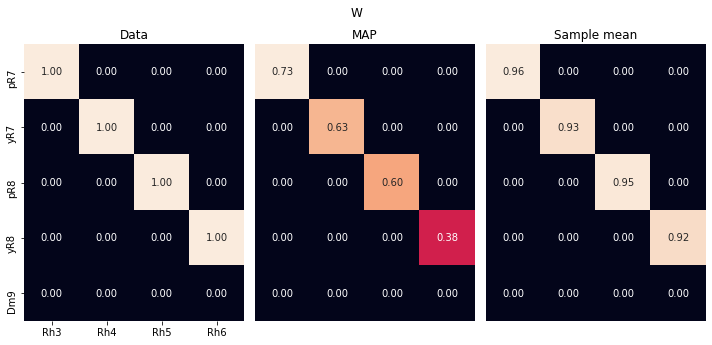

In [162]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

titles = ['Data', 'MAP', 'Sample mean']
param = 'W'
for i, dataset in enumerate([data, map_, mean]):
    sns.heatmap(dataset[param], ax=axes[i], annot=True, cbar=False, fmt='.2f')
    axes[i].set_title(titles[i])
    if i != 0:
        axes[i].axis('off')
fig.suptitle(param)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

## Recurrent weights

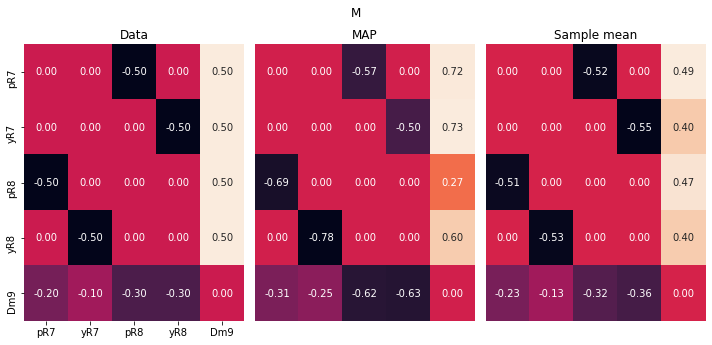

In [161]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

titles = ['Data', 'MAP', 'Sample mean']
param = 'M'
for i, dataset in enumerate([data, map_, mean]):
    sns.heatmap(dataset[param], ax=axes[i], annot=True, cbar=False, fmt='.2f')
    axes[i].set_title(titles[i])
    if i != 0:
        axes[i].axis('off')
fig.suptitle(param)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

## Latent inputs

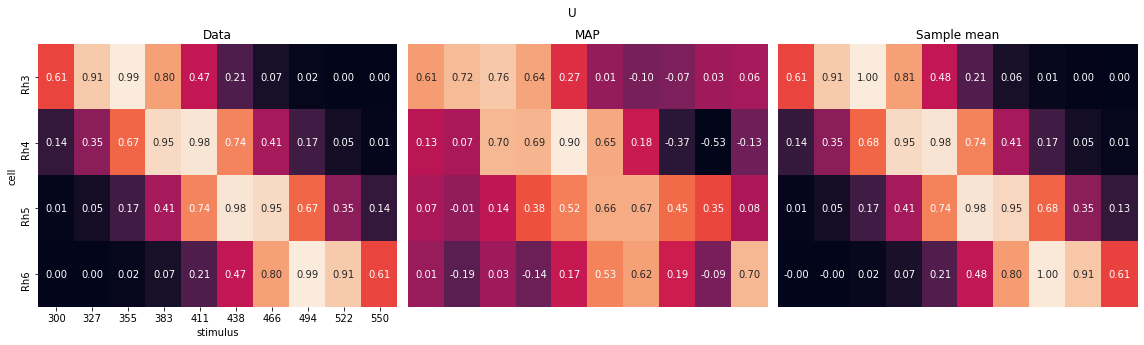

In [156]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

titles = ['Data', 'MAP', 'Sample mean']
param = 'U'
for i, dataset in enumerate([data, map_, mean]):
    sns.heatmap(dataset[param], ax=axes[i], annot=True, cbar=False, fmt='.2f')
    axes[i].set_title(titles[i])
    if i != 0:
        axes[i].axis('off')
fig.suptitle(param)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

## Responses

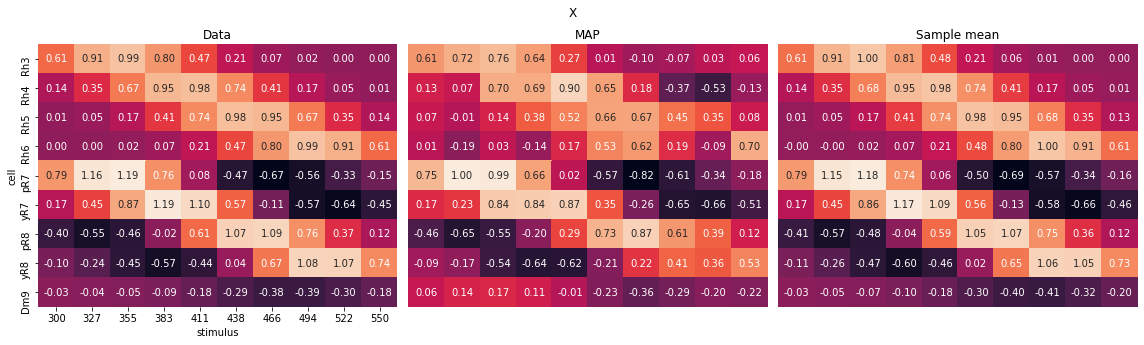

In [163]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

titles = ['Data', 'MAP', 'Sample mean']
param = 'X'
for i, dataset in enumerate([data, map_, mean]):
    sns.heatmap(dataset[param], ax=axes[i], annot=True, cbar=False, fmt='.2f')
    axes[i].set_title(titles[i])
    if i != 0:
        axes[i].axis('off')
fig.suptitle(param)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

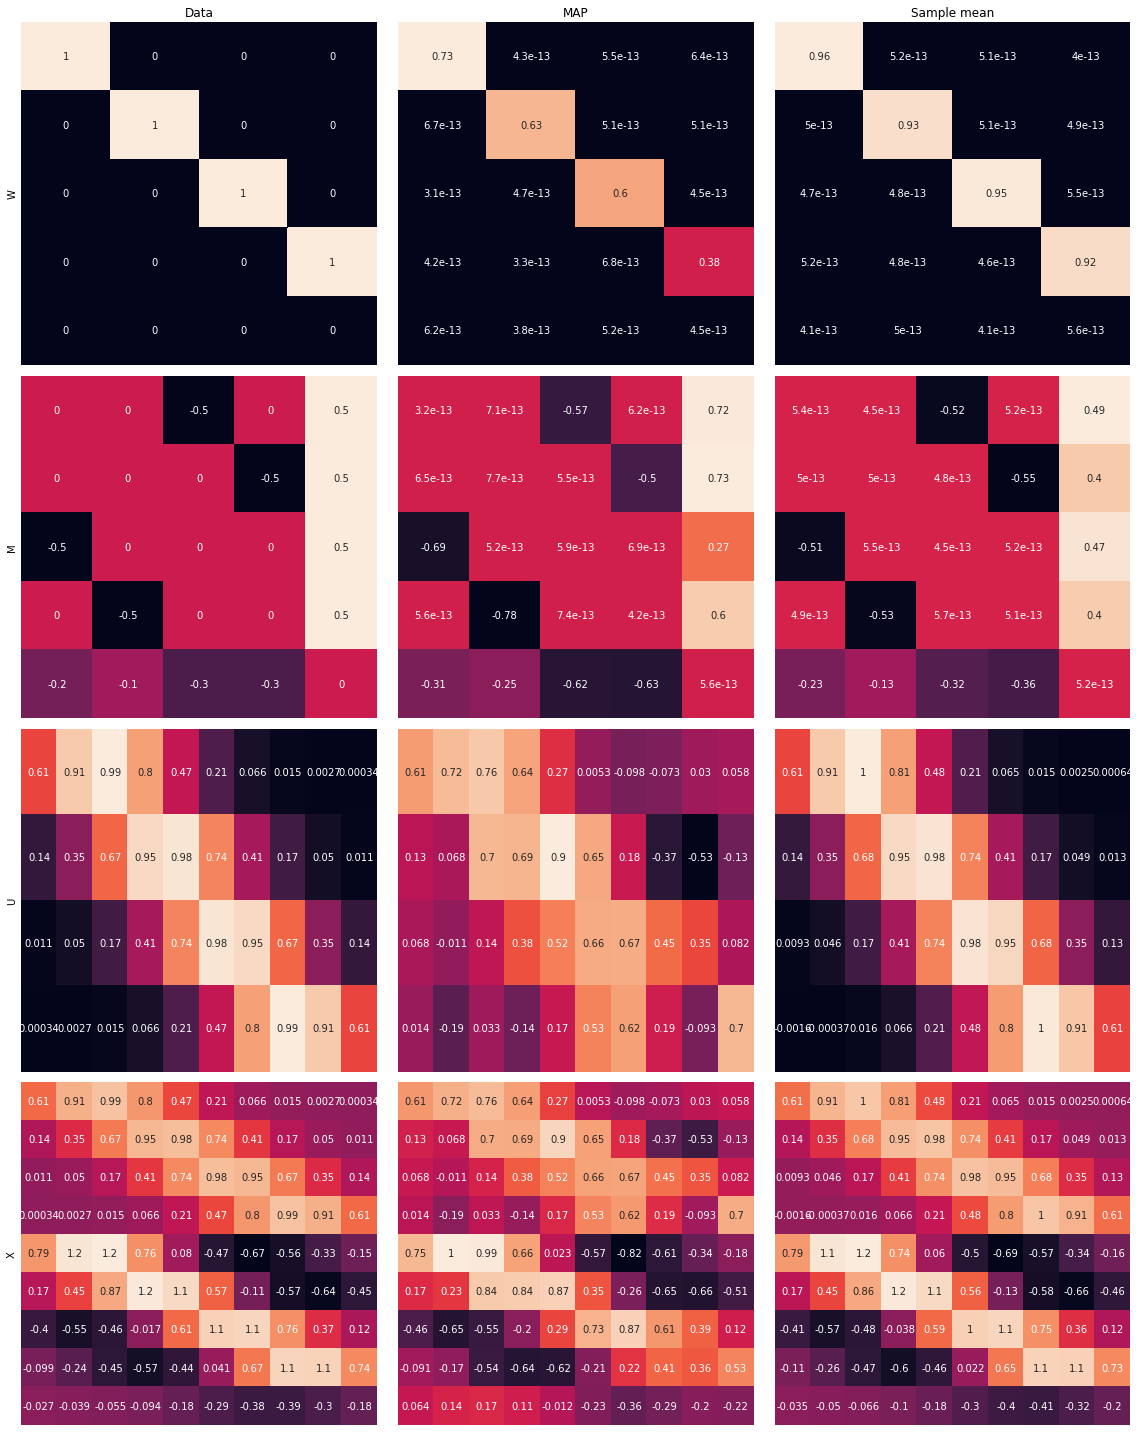

In [33]:
fig, axes = plt.subplots(4, 3, figsize=(16, 20))
for i, param in enumerate(['W', 'M', 'U', 'X']):
    sns.heatmap(data[param], ax=axes[i, 0], annot=True, cbar=False)
    sns.heatmap(map_[param], ax=axes[i, 1], annot=True, cbar=False)
    sns.heatmap(mean[param], ax=axes[i, 2], annot=True, cbar=False)

for ax in axes.ravel():
    ax.axes.get_xaxis().set_visible(False)
    ax.set_xlabel('')
    ax.set_yticks([])

for i, param in enumerate(['W', 'M', 'U', 'X']):
    axes[i, 0].set_ylabel(param, rotation=0)

for i, title in enumerate(['Data', 'MAP', 'Sample mean']):
    axes[0, i].set_title(title)

plt.tight_layout()
plt.savefig(f'figures/{notebook_name}_results.svg', format='svg')

# Graphical posterior predictive checking

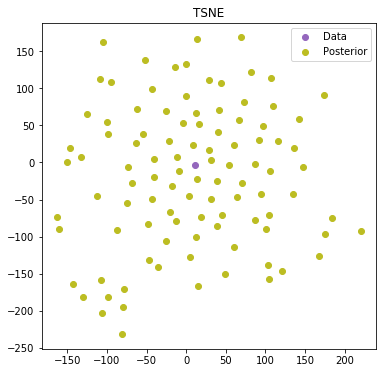

In [97]:
samples = ccmf.get_samples()
post_samples = np.array(torch.stack([EX(Wi, Mi, Ui).flatten() for Wi, Mi, Ui in zip(samples['W'], samples['M'], samples['U'])]))
concat = np.concatenate([data['X'].values.reshape(1, data['X'].shape[0] * data['X'].shape[1]), post_samples])
embedding = TSNE(n_components=2)
y = embedding.fit_transform(concat)
labels = np.array([0] + [1] * len(post_samples))

plt.figure(figsize=(6, 6))
plt.scatter(*y[labels==0].T, label='Data', c='C4')
plt.scatter(*y[labels==1].T, label='Posterior', c='C8')
plt.legend()
plt.title('TSNE')
plt.savefig(f'figures/{notebook_name}_tsne.svg', format='svg')